# The Langevin dynamics of a chain of beads connected by harmonic springs in one dimension


## Definiton of a problem

We have a chain of $N$ beads of masses $m_n$ connected by harmonic springs of spring constants $k$ and masses equal to zero. First and last beads in the chain are not connected to anything besides to second and second to last beads respectively, meaning the system can move freely along the $x$ axis. Each bead (except two beads on the start and end) is connected to their left and their right bead by an elastic spring, meaning on each bead there are two forces acting on it. When there is no displacement in the spring, it's length is D, meaning at this state there is no tension in the spring and there is no force acting on beads it is connected to. When there is displacement $x$ however, the force acting on the bead from the spring is defined by Hooke's law: $\vec{F}=-k\vec{x}$. In addition to this, we introduce a 'noise' force $\vec{F_{noise}}$ , which is randomly changing during each time interval $\triangle t$ by Gaussian distribution with mean $\mu = 0$ and $\sigma = \sqrt{2 T \gamma \triangle t}$. $T$ being temperature, and $\gamma$ friction coefficient.


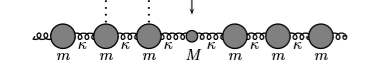

Thus the resulting force for each bead is $\vec{F_n} = \vec{F_{n-1}} + \vec{F_{n+1}} + \vec{F_{noise}}$. First we set our parameters and then we write functions for calculating the resulting force and for simulating the process.

## First Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Simulation parameters
num_beads = 9# Number of beads in the chain
mass = np.ones(num_beads)  # Mass of each bead
spring_constant = 1.0  # Spring constant
temperature = 1.0  # Temperature
friction_coefficient = 100# Friction coefficient

time_step = 0.01  # Time step
num_steps = 10000  # Number of simulation steps
D = 10 #equilibrium distance between beads (F = 0)

# Initialize positions and velocities
# Distance between neighbouring beads are same throught the whole chain 
positions = np.zeros(num_beads)
d = 0
starting = np.zeros(num_beads) #Starting positions for rest of the simulations
for i in range(num_beads):
    starting[i] = d
    d=d+3

velocities = np.zeros(num_beads)
positions = np.copy(starting)
kinetic_energies = []
# Define forces function
# Hooke's Law
def calculate_forces(positions, spring_constant):
    forces = np.zeros(num_beads)
    for i in range(1, num_beads - 1):
        forces[i]=0
        if positions[i]-positions[i-1]<D:
            forces[i]+=spring_constant*(abs(D-(positions[i]-positions[i-1])))
        else:
            forces[i]-=spring_constant*(abs(D-(positions[i]-positions[i-1])))
        if positions[i+1]-positions[i]<D:
            forces[i]-=spring_constant*(abs(D-(positions[i+1]-positions[i])))
        else:
            forces[i]+=spring_constant*(abs(D-(positions[i+1]-positions[i])))

    if positions[1]-positions[0]<D:
        forces[0]-=spring_constant*(abs(D-(positions[1]-positions[0])))
    else:
        forces[0]+=spring_constant*(abs(D-(positions[1]-positions[0])))
        
    if positions[num_beads - 1]-positions[num_beads - 2]<D:
        forces[num_beads - 1]+=spring_constant*(abs(D-(positions[num_beads - 1]-positions[num_beads - 2])))
    else:
        forces[num_beads - 1]-=spring_constant*(abs(D-(positions[num_beads - 1]-positions[num_beads - 2])))
    return forces

# Define Langevin dynamics function
def langevin_dynamics(positions, velocities, mass, spring_constant,friction_coefficient,time_step,temperature):
    forces = calculate_forces(positions, spring_constant)
    random_forces = np.random.normal(0, np.sqrt(2 * temperature * friction_coefficient * time_step), num_beads)
    velocities += (forces + random_forces/ mass) * time_step
    positions += velocities * time_step
    total_kinetic_energy = 0.5 * mass * np.sum(velocities**2)
    kinetic_energies.append(total_kinetic_energy)
    

center_of_mass = []
history = []
middle_bead = []
#Simulate Langevin dynamics
#history variable stores positions of all beads during the simulation
for step in range(num_steps):
    langevin_dynamics(positions, velocities, mass,spring_constant,friction_coefficient,time_step,temperature)
    center_of_mass.append(np.mean(positions))    #Since all beads have same mass in this example, formula is more simple
    middle_bead.append(positions[num_beads // 2])
    history.append([])
    for i in range(num_beads):
        history[step].append([positions[i],0])

history = np.asarray(history) 



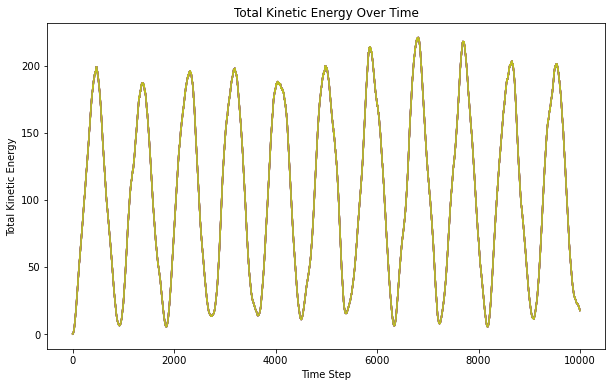

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(kinetic_energies)
plt.xlabel('Time Step')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy Over Time')
plt.show()

### Comparison of the middle bead's and center of mass movement 
Here we plot the movement of both the middle bead and the center of mass throught the simulation. We immiedetly spot that they had very different paths. Additionally, we also plot the movement of all beads below.


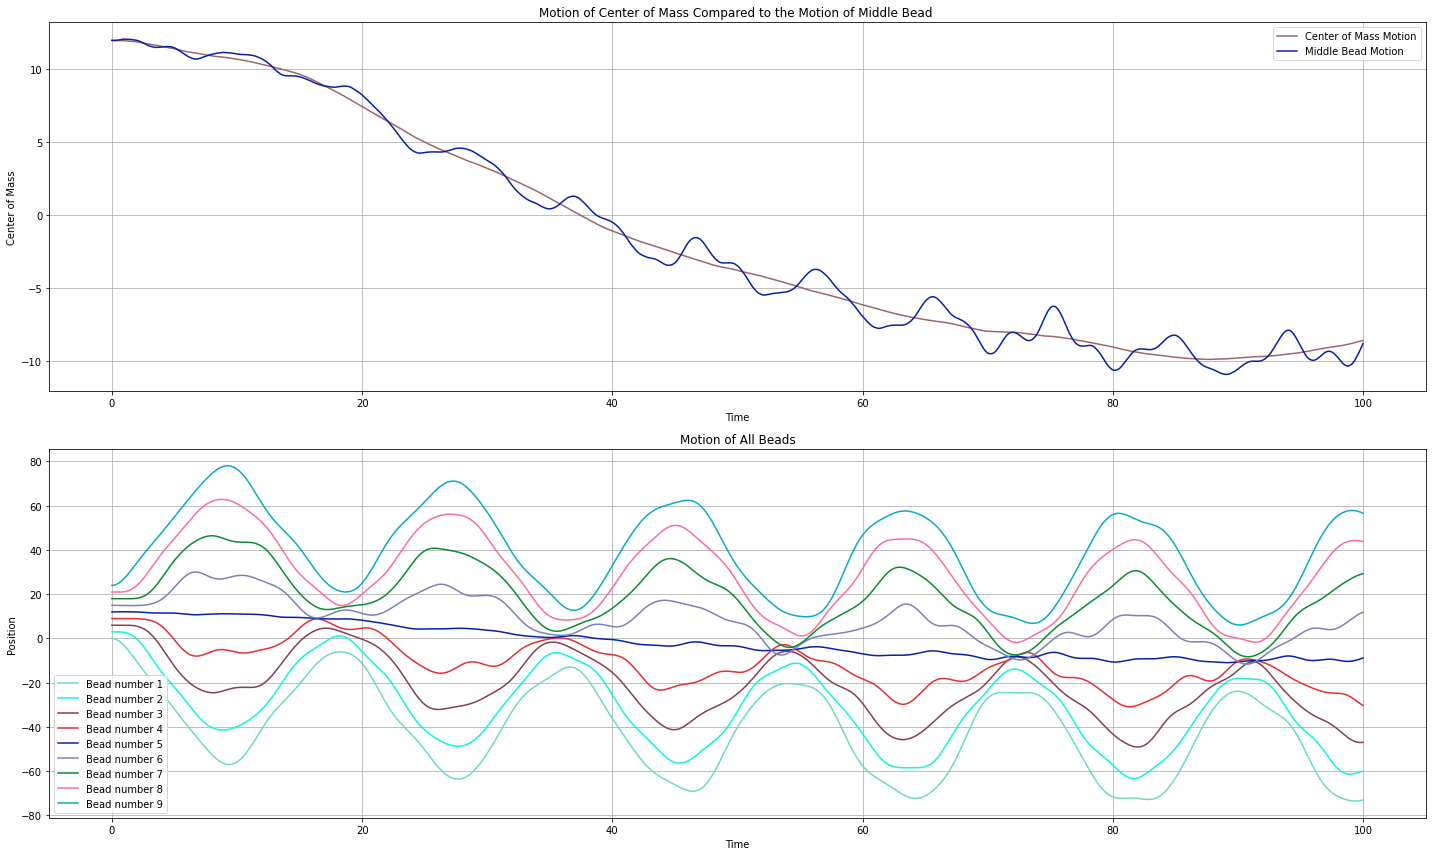

In [3]:
# Plot the results
%matplotlib inline 
colors =np.random.rand(num_beads+1,3)
historic_time = np.arange(num_steps) * time_step
plot_history = np.transpose(history, (1, 2, 0))

plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(historic_time, center_of_mass, c=colors[-1], label = 'Center of Mass Motion')
plt.plot(historic_time, middle_bead, c=colors[(num_beads)//2], label = 'Middle Bead Motion')
plt.xlabel('Time')
plt.ylabel('Center of Mass')
plt.title('Motion of Center of Mass Compared to the Motion of Middle Bead ')

plt.legend()
plt.subplot(2, 1, 2)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Motion of All Beads')

for i in range(num_beads):
    plt.plot(historic_time, plot_history[i][0], c=colors[i], label = "Bead number "+str(i+1))
    
plt.legend()
plt.tight_layout()
plt.show()


Next we run a little animation which further helps us visualize the movement of beads.

In [8]:
%matplotlib qt 

import matplotlib.animation as animation

anim_step = 50
anim_data = []
anim_time = []
cmass = []
for i in range(len(history)):
    if i%anim_step==0:
        #print(history[i])
        anim_data.append(history[i])
        anim_time.append(historic_time[i])
        cmass.append([center_of_mass[i],0])
anim_data = np.asarray(anim_data)
    
fig, ax = plt.subplots()
myPlot = plt.scatter(anim_data[0][:,0], anim_data[0][:,1], c=colors[0:-1],
                     s=30, marker = 'o')
plt.grid()
plt.xlim([-100,100])
plt.ylim([-10,10])
plt.axhline(0, color='black', linewidth=.5, alpha = 0.5)
plt.axvline(0, color='black', linewidth=.5, alpha = 0.5)
time = ax.annotate("t = "+str(anim_data[0]), xy=(7., 9), xytext=(7., 9))

def animate(i):
    myPlot.set_offsets(anim_data[i])
    txt = "t = {x:.3f}".format(x=anim_time[i])
    time.set_text(txt)
    return myPlot,
    
myAnimation = animation.FuncAnimation(fig, animate, frames=num_steps//anim_step, interval=1, blit=False, repeat=False)
plt.show()

Keeping all other parameters same, we test the simulation once again but with more randomly distributed beads' initial positions:

In [5]:
# Distance between neighbouring beads are different and more random 
positions = np.zeros(num_beads)
d = 0
for i in range(num_beads):
    positions[i] = d
    d=d+np.random.uniform(1,12)

velocities = np.zeros(num_beads)
print(positions)

new_center_of_mass = []
new_history = []
new_middle_bead = []
#Simulate Langevin dynamics
for step in range(num_steps):
    langevin_dynamics(positions, velocities, mass,spring_constant,friction_coefficient,time_step,temperature)
    new_center_of_mass.append(np.mean(positions))    #Since all beads have same mass in this example, formula is more simple
    new_middle_bead.append(positions[num_beads // 2])
    new_history.append([])
    for i in range(num_beads):
        new_history[step].append([positions[i],0])

new_history = np.asarray(new_history) 



[ 0.          9.22166202 10.62619421 22.27147111 30.40343597 32.48726157
 42.59038458 50.03779904 60.81849226]


### Comparison of the middle bead's and center of mass movement 

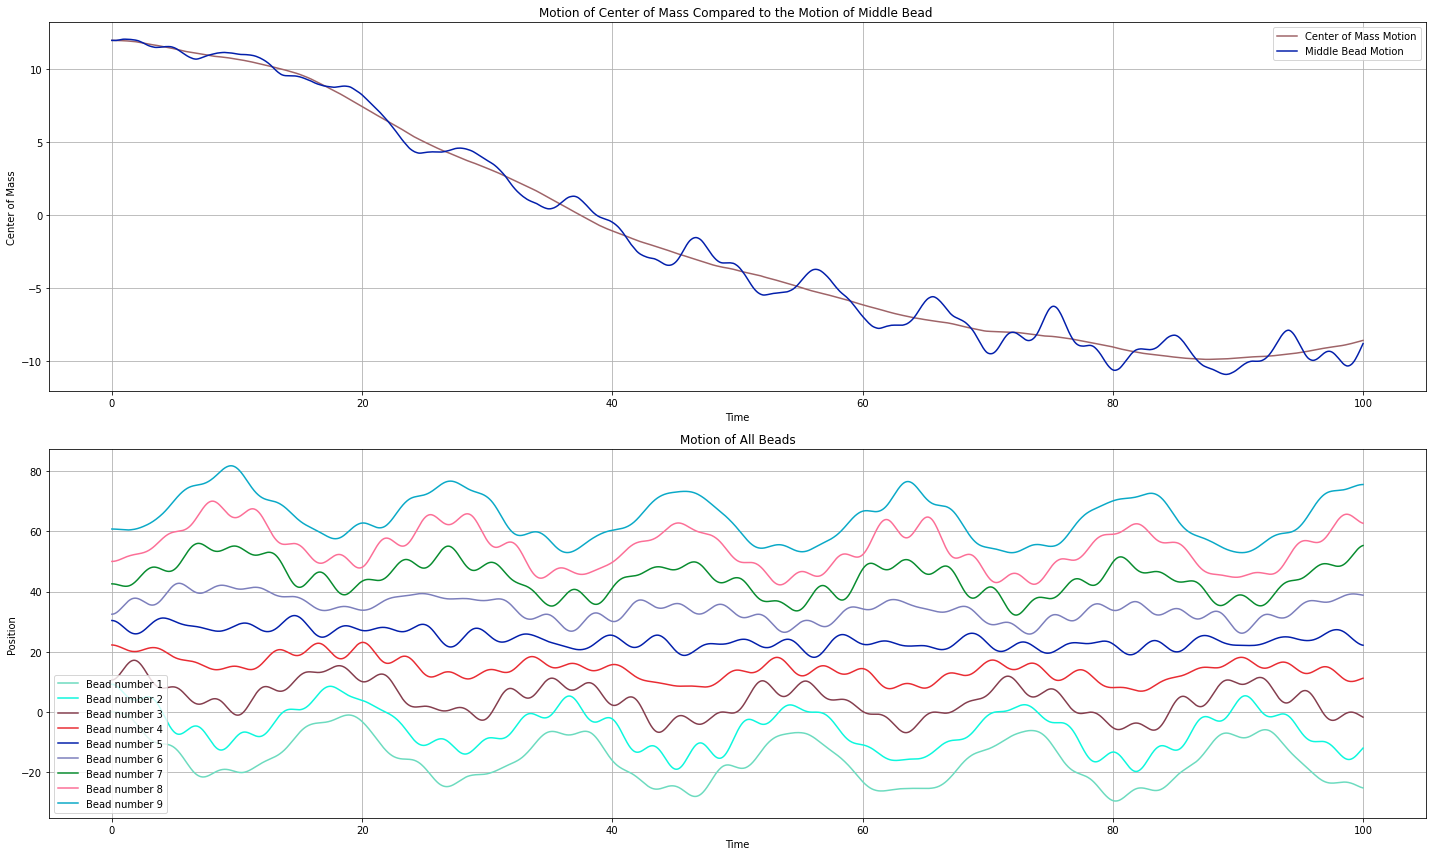

In [6]:
# Plot the results
%matplotlib inline 
#colors =np.random.rand(num_beads+1,3)
historic_time = np.arange(num_steps) * time_step
plot_history = np.transpose(new_history, (1, 2, 0))

plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(historic_time, center_of_mass, c=colors[-1], label = 'Center of Mass Motion')
plt.plot(historic_time, middle_bead, c=colors[(num_beads)//2], label = 'Middle Bead Motion')
plt.xlabel('Time')
plt.ylabel('Center of Mass')
plt.title('Motion of Center of Mass Compared to the Motion of Middle Bead ')

plt.legend()
plt.subplot(2, 1, 2)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Motion of All Beads')

for i in range(num_beads):
    plt.plot(historic_time, plot_history[i][0], c=colors[i], label = "Bead number "+str(i+1))
    
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
%matplotlib qt 

import matplotlib.animation as animation

anim_step = 50
anim_data = []
anim_time = []
cmass = []
for i in range(len(new_history)):
    if i%anim_step==0:
        #print(history[i])
        anim_data.append(new_history[i])
        anim_time.append(historic_time[i])
        cmass.append([new_center_of_mass[i],0])
anim_data = np.asarray(anim_data)
    
fig, ax = plt.subplots()
myPlot = plt.scatter(anim_data[0][:,0], anim_data[0][:,1], c=colors[0:-1],
                     s=30, marker = 'o')
plt.grid()
plt.xlim([-100,100])
plt.ylim([-10,10])
plt.axhline(0, color='black', linewidth=.5, alpha = 0.5)
plt.axvline(0, color='black', linewidth=.5, alpha = 0.5)
time = ax.annotate("t = "+str(anim_data[0]), xy=(7., 9), xytext=(7., 9))

def animate(i):
    myPlot.set_offsets(anim_data[i])
    txt = "t = {x:.3f}".format(x=anim_time[i])
    time.set_text(txt)
    return myPlot,
    
myAnimation = animation.FuncAnimation(fig, animate, frames=num_steps//anim_step, interval=1, blit=False, repeat=False)
plt.show()

# Varying the parameters and observing their effects on the system
We will look at different values of the parameters changing one by one, and then changing multiple and see how they affect the systems behaviour

# Spring constant
 This parameter governs the elasticity or 'springiness' of our springs. More formally, the spring constant in Hooke's law denotes the force needed to extend or compress a spring by a certain length, effectively describing the stiffness of the spring.

If we consider a higher spring constant, this indicates that the springs are stiffer. To put it into perspective, imagine attempting to stretch or compress a spring. The stiffer the spring (higher k), the more force you would need to change its length. Therefore, in our system of beads connected by these springs, a high spring constant would mean that the beads have more resistance against movement due to the increased rigidity of the springs that connect them.

To visualize and understand the effect of the spring constant on our bead-spring system, we turn to our plots. Through close examination, we can draw clear observations about the relationship between the spring constant and the motion in the system.

As expected, the plots reveal that when the spring constant is higher, there is less motion throughout the system. This trend is quite intuitive: when the springs are stiffer, it's harder for the beads to move, as they are more strongly held in their positions. This effectively reduces the overall kinetic energy in the system, leading to less motion.

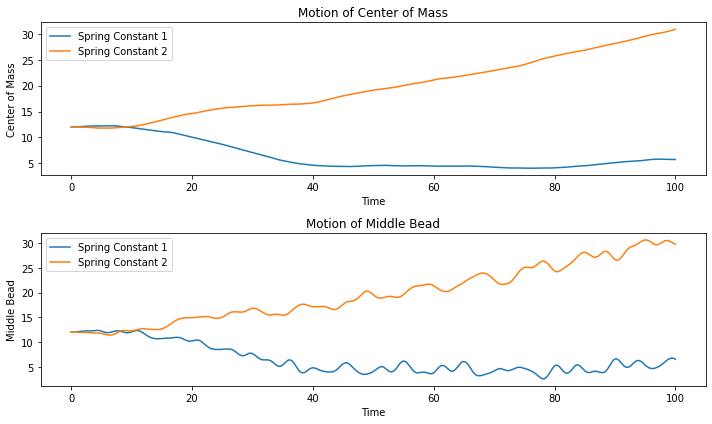

In [88]:
# Simulation parameters
%matplotlib inline
spring_constant_1 = 1.0
spring_constant_2 = 5.0

# ...

# Simulate Langevin dynamics with spring_constant_1
center_of_mass_1 = []
middle_bead_1 = []

positions = np.copy(starting)
velocities = np.zeros(num_beads)

for step in range(num_steps):
    langevin_dynamics(positions, velocities, mass,spring_constant,friction_coefficient,time_step,temperature)
    center_of_mass_1.append(np.mean(positions))
    middle_bead_1.append(positions[num_beads // 2])
    

# Simulate Langevin dynamics with spring_constant_2
# Reset positions and velocities
center_of_mass_2 = []
middle_bead_2 = []

positions = np.copy(starting)
velocities = np.zeros(num_beads)

for step in range(num_steps):
    langevin_dynamics(positions, velocities, mass,spring_constant,friction_coefficient,time_step,temperature)
    center_of_mass_2.append(np.mean(positions))
    middle_bead_2.append(positions[num_beads // 2])

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(historic_time, center_of_mass_1, label='Spring Constant 1')
plt.plot(historic_time, center_of_mass_2, label='Spring Constant 2')
plt.xlabel('Time')
plt.ylabel('Center of Mass')
plt.title('Motion of Center of Mass')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(historic_time, middle_bead_1, label='Spring Constant 1')
plt.plot(historic_time, middle_bead_2, label='Spring Constant 2')
plt.xlabel('Time')
plt.ylabel('Middle Bead')
plt.title('Motion of Middle Bead')
plt.legend()

plt.tight_layout()
plt.show()


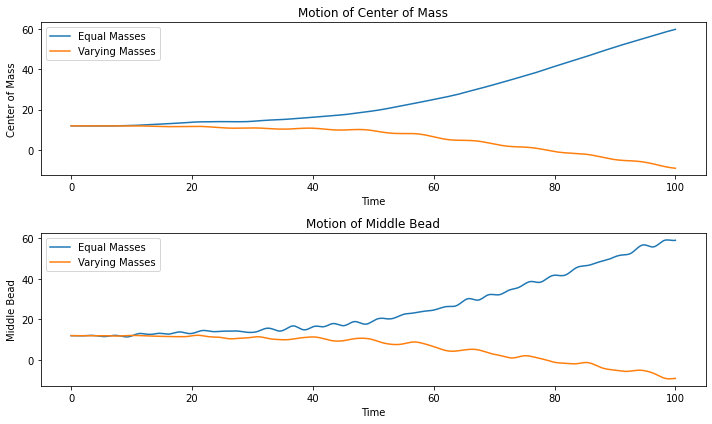

In [83]:
# Simulation parameters
%matplotlib inline

masses_1 = np.ones(num_beads)  # Equal masses
masses_2 = np.zeros(num_beads)
m=1.
# Varying masses
for i in range(num_beads//2+1):
    masses_2[i] = m
    masses_2[num_beads-1-i]=m
    m=m+2
    

# Simulate Langevin dynamics with equal masses
center_of_mass_1 = []
middle_bead_1 = []
positions = np.copy(starting)
velocities = np.zeros(num_beads)

for step in range(num_steps):
    langevin_dynamics(positions, velocities, masses_1,spring_constant,friction_coefficient,time_step,temperature)
    center_of_mass_1.append(np.dot(positions,masses_1)/np.sum(masses_1))
    middle_bead_1.append(positions[num_beads // 2])

# Reset positions and velocities
positions = np.copy(starting)
velocities = np.zeros(num_beads)

# Simulate Langevin dynamics with varying masses
center_of_mass_2 = []
middle_bead_2 = []

for step in range(num_steps):
    langevin_dynamics(positions, velocities, masses_2,spring_constant,friction_coefficient,time_step,temperature)
    center_of_mass_2.append(np.dot(positions,masses_2)/np.sum(masses_2))
    middle_bead_2.append(positions[num_beads // 2])

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(historic_time, center_of_mass_1, label='Equal Masses')
plt.plot(historic_time, center_of_mass_2, label='Varying Masses')
plt.xlabel('Time')
plt.ylabel('Center of Mass')
plt.title('Motion of Center of Mass')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(historic_time, middle_bead_1, label='Equal Masses')
plt.plot(historic_time, middle_bead_2, label='Varying Masses')
plt.xlabel('Time')
plt.ylabel('Middle Bead')
plt.title('Motion of Middle Bead')
plt.legend()

plt.tight_layout()
plt.show()


# Masses
In the case of equal masses across all beads, the behavior of our system is symmetric. The dynamics are more straightforward because all beads react uniformly to the forces exerted by the springs and the damping. Consequently, this symmetry also means that the center of mass of our system will move in a regular, predictable fashion. For example, if there are no external forces on the system, and we start with the system in equilibrium, the center of mass will remain stationary. The motion of the middle bead will also be simpler and symmetric in this case, especially if we have an odd number of beads. As the middle bead is equally influenced by the surrounding beads, it experiences balanced forces from both sides, leading to a symmetrical oscillation pattern.

When we consider a system with varying masses, the dynamics become more complex. Beads with larger masses have greater inertia, meaning they resist changes in their motion more than beads with smaller masses. Consequently, in a system where the bead masses vary, different beads will move at different speeds and may oscillate with different frequencies, even when subjected to the same spring and damping forces. This diversity in bead motion can lead to more complex and interesting patterns of motion in the system.

The motion of the center of mass will also be affected by the distribution of masses. If there are heavier beads on one side of the system, the center of mass will be closer to that side, and it might move more slowly than in the equal-mass case, as it's more influenced by the larger masses.

The motion of the middle bead could be significantly influenced by the mass distribution as well. If the middle bead is heavier than the others, it will move less and oscillate with a lower frequency, assuming the same initial displacement. On the other hand, if it's lighter, it will be more susceptible to the forces acting on it, resulting in larger displacements and potentially higher-frequency oscillations.

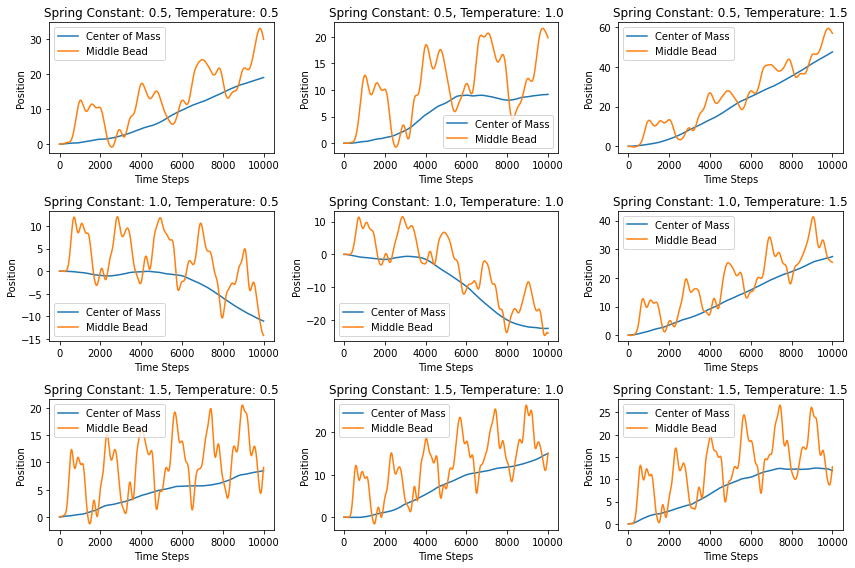

In [66]:
# Function to simulate Langevin dynamics
%matplotlib inline
kinetic_energy = []
def simulate_langevin(num_beads, mass, spring_constant, temperature, friction_coefficient, time_step, num_steps):
    positions = np.zeros(num_beads)
    velocities = np.zeros(num_beads)
    
    center_of_mass = []
    middle_bead = []
    
    for step in range(num_steps):
        langevin_dynamics(positions, velocities, mass, spring_constant, friction_coefficient, time_step, temperature)
        center_of_mass.append(np.mean(positions))
        middle_bead.append(positions[num_beads // 2])
        
    
    return center_of_mass, middle_bead


# Parameter Exploration
num_beads = 10
mass = 1.0
spring_constants = [0.5, 1.0, 1.5]
temperatures = [0.5, 1.0, 1.5]
time_step = 0.01
num_steps = 10000

plt.figure(figsize=(12, 8))
plot_index = 1

for spring_constant in spring_constants:
    for temperature in temperatures:
        center_of_mass, middle_bead = simulate_langevin(num_beads, mass, spring_constant, temperature, friction_coefficient, time_step, num_steps)
        
        plt.subplot(len(spring_constants), len(temperatures), plot_index)
        plt.plot(center_of_mass, label='Center of Mass')
        plt.plot(middle_bead, label='Middle Bead')
        plt.xlabel('Time Steps')
        plt.ylabel('Position')
        plt.title(f'Spring Constant: {spring_constant}, Temperature: {temperature}')
        plt.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()

Low spring constant, low temperature (1.0, 1.0): Here, the springs are relatively loose, and the random forces due to temperature are relatively small. The beads will likely exhibit larger-amplitude oscillations, but with less random motion.

Low spring constant, high temperature (1.0, 3.0): With a low spring constant and high temperature, the beads will be loosely bound and subject to large random forces. This will likely lead to significant displacements and a lot of random motion.

High spring constant, low temperature (3.0, 1.0): Here, the springs are very stiff, and the temperature is relatively low. This will likely result in small displacements around the equilibrium positions and minimal random motion.

High spring constant, high temperature (3.0, 3.0): With a high spring constant and high temperature, the beads are tightly bound but subject to large random forces. These opposing factors might lead to complex dynamics, with the beads oscillating tightly around their equilibrium positions but also exhibiting noticeable random motion due to the temperature.

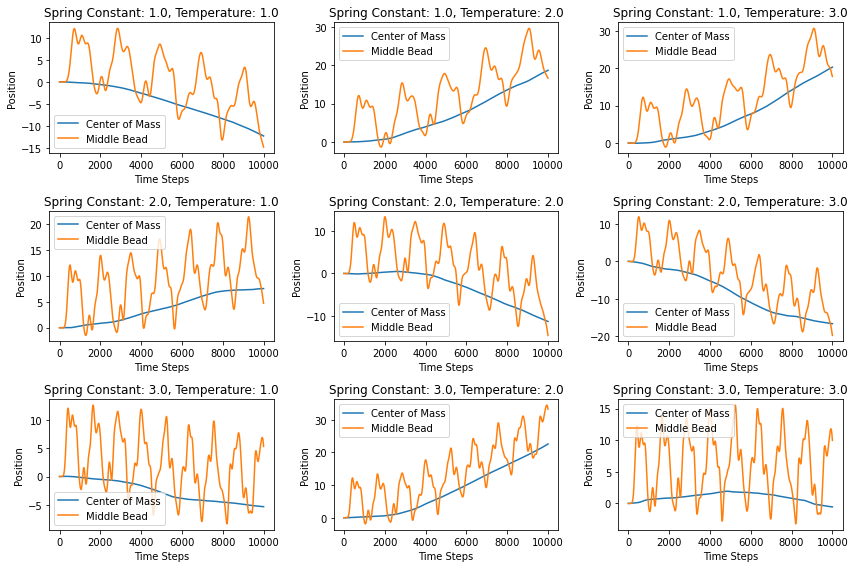

In [65]:
# Comparative Analysis
spring_constants = [1.0, 2.0, 3.0]
temperatures = [1.0, 2.0, 3.0]

plt.figure(figsize=(12, 8))
plot_index = 1

for spring_constant in spring_constants:
    for temperature in temperatures:
        center_of_mass, middle_bead = simulate_langevin(num_beads, mass, spring_constant, temperature, friction_coefficient, time_step, num_steps)
        
        plt.subplot(len(spring_constants), len(temperatures), plot_index)
        plt.plot(center_of_mass, label='Center of Mass')
        plt.plot(middle_bead, label='Middle Bead')
        plt.xlabel('Time Steps')
        plt.ylabel('Position')
        plt.title(f'Spring Constant: {spring_constant}, Temperature: {temperature}')
        plt.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()

Low mass, low friction (1.0, 20): Here, the beads have a low inertia and face relatively little damping. This could result in more rapid and erratic movements, with the beads more freely responding to the random forces from the Langevin dynamics.

Low mass, high friction (1.0, 80): With a low mass and high friction, the beads are more responsive to forces but face strong damping. This might result in slower, more controlled movements, despite the low mass of the beads.

High mass, low friction (3.0, 20): Here, the beads have a high inertia and face relatively little damping. This could lead to slower, less erratic movements, with the beads less affected by the random forces from the Langevin dynamics.

High mass, high friction (3.0, 80): With a high mass and high friction, the beads are less responsive to forces and also face strong damping. This will likely result in very slow, controlled movements, with the beads significantly resisting the random forces from the Langevin dynamics.

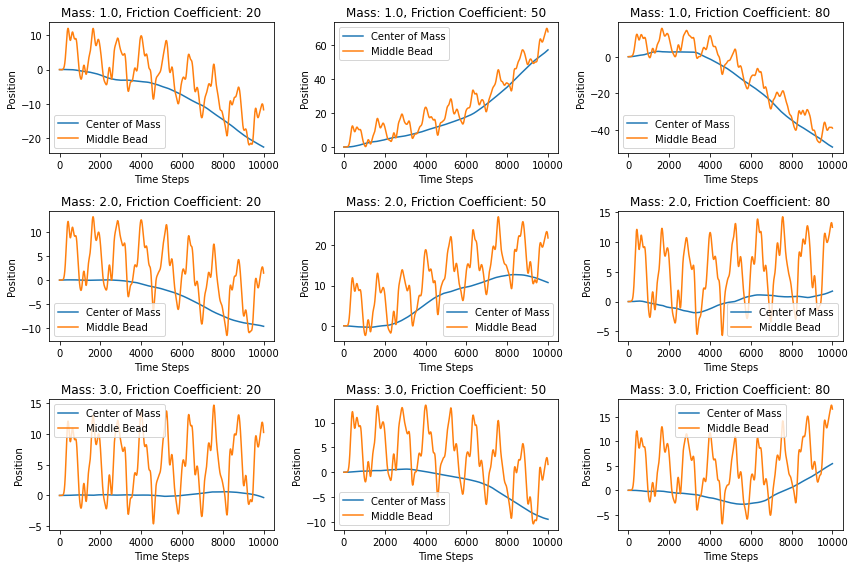

In [64]:
# Sensitivity Analysis
masses = [1.0, 2.0, 3.0]
friction_coefficients = [20, 50, 80]

plt.figure(figsize=(12, 8))
plot_index = 1

for mass in masses:
    for friction_coefficient in friction_coefficients:
        center_of_mass, middle_bead = simulate_langevin(num_beads, mass, spring_constant, temperature, friction_coefficient, time_step, num_steps)
        
        plt.subplot(len(masses), len(friction_coefficients), plot_index)
        plt.plot(center_of_mass, label='Center of Mass')
        plt.plot(middle_bead, label='Middle Bead')
        plt.xlabel('Time Steps')
        plt.ylabel('Position')
        plt.title(f'Mass: {mass}, Friction Coefficient: {friction_coefficient}')
        plt.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()

# Concluding Remarks
The mass of the beads fundamentally affects their inertia. In our simulations, we chose equal masses for simplicity. This equal distribution resulted in symmetrical motion patterns. Higher bead masses led to greater resistance to changes in motion, resulting in slower movement. Conversely, lower bead masses resulted in more responsive and potentially erratic movement.

The spring constant controls the stiffness of the springs connecting the beads. Higher spring constants resulted in tighter springs, leading to less motion and smaller oscillations of the beads around their equilibrium positions. On the other hand, lower spring constants gave rise to looser springs, leading to larger oscillations.

Temperature in our simulations served as a surrogate for the strength of random thermal forces in the system. Higher temperatures led to larger random forces, resulting in increased movement and more significant fluctuations. Conversely, lower temperatures resulted in smaller random forces and less overall motion.

The friction coefficient represented the damping force acting on each bead, with higher values leading to stronger damping. This resulted in slower, more controlled motion of the beads. Lower friction coefficients, on the other hand, led to less damping and more rapid, less predictable motion.

The time step and number of steps determined the granularity of our simulation. A smaller time step allows for a more accurate representation of the system's dynamics at the expense of computational cost, while the number of steps determines the total simulated time.v